## DNSC 6305 Final Group Project: Group 8

## ASK 1

## Search Data and Data Description

In this project, our group focus on the various applications in google play store. The dataset provides details about the App names, category of Apps, App rating, installations, price and many related information about the Apps. The size of this dataset is 676.46 MB, and was collected in the month of June 2021. The dataset has 24 variables and 2.3 Million+ instances. Each instance represents an Application in the google play store. 

As we think some variables are not very useful for our analytical questions and include many null values we use csvcut to cut off the dataset and create a new csvfile.

### Data Source

We found this dataset in Kaggle here is the link:https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps/data

This dataset also available in Github: https://github.com/gauthamp10/Google-Playstore-Dataset from the Author Gautham Prakash


### Why this dataset is important and What appeals?

1. This dataset fits the requirement of Dimensional Modeling and Analytical Analysis.
2. Google-playstore dataset includes a wide range of information  and ecompasses a comprehensive set of columns pertaining to our dataset.
3. Electronic devices are available to everyone today and a lot of apps are downloaded on the cell phones. When we as a group want to download some apps, we usually look at its number of downloads, ratings and reviews. So the Google-playstore data is appealed to us!

### How dataset fit the dimension modeling and analytical analysis

This dataset contains records in transactional level, the variables also show in both numerical and categorical level. To fit the dimension model, we can use numerical columns as our facts to generate fact table, use categorical columns for the dimension tables. Facts are the measurements from the business process. Refer to our data we have rating, price and number of installations of the App for google playstore, these facts could help us define the which App is the most poplular App. Dimension provides the context surrounding a business process event. In simple terms, they give who, what, where of a fact. This aslo fit our dataset, because we have App name, App Category, developer id and email an more. So we can generate the dmension tables for App, Developer, Editor and Date which will include the related contxt for the business purpose. Also the dataset include date value, it is an important feature for business, and we can use sql to generate specific date dimension table which help us identify the relationship between variables in our analytical questions.

### Analytics Questions

1.To analyze the distribution of paid apps across different categories and  investigate whether the highest purchase volume corresponds to the highest rating.

2.which are the top categories of apps that have an average rating greater than 4.2？ Compare the average ratings between paid and free apps within those top categories.

3.Which developers have the highest number of app installations or top-rated apps during 2020 ?

### What we concern and How we overcome

1. There is no exact installation number, only approximate installations and maximum and minimum installations. For example, the number of installation is 5000+. To solve this problem, we calculate the average installation and add a new column.
2. The data is too large, the running is very slow, and it takes up a lot of memory----xlarge can be used to run faster.
3. There is no continuous date data. Each app only has the release date and the last upgrade date. The middle date of each app upgrade is missing. Therefore, it may limit our ability to analyze the frequency of app upgrades and the ratings of the app. But having the release date still helps our analysis and makes the database more complete, so we choose to still keep the date.
4. Some data are missing. Some columns contain many blank values, which will affect our generation of data sets and cause the data to fail to connect properly. So we first used csvkit to delete some useless columns. This step greatly reduced the empty values in our data set. Then after generating the table, we also selectively deleted some vacant date data to complete the connection between the dimension and fact table.
5. When plotting the graph, the difference in value of graph performance is not obvious. We have changed the range limits of the horizontal and vertical coordinates so that the difference in range becomes more clearly visible.

# ASK 2

# Date Wrangling and Dimensional Modeling

**Import sql and create database**

In [1]:
%load_ext sql

In [2]:
!dropdb -U student finalproject

In [3]:
!createdb -U student finalproject

In [2]:
%sql postgresql://student@/finalproject

In [3]:
!pwd

/home/ubuntu/notebooks


### Download and Import Data

Here is the resource of our dataset:https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps/data

Download the csv file called **"Google-Playstore.csv.zip"** to your local computer

Upload the file directly from your local computer to your current working directory

**Unzip the file**

In [6]:
!unzip -o Google-Playstore.csv.zip

unzip:  cannot find or open Google-Playstore.csv.zip, Google-Playstore.csv.zip.zip or Google-Playstore.csv.zip.ZIP.


**Check how many columns in our dataset and select the columns we use for modeling, create a new csv file called Playstore2.csv**

There are 24 columns in the dataset

In [7]:
!csvcut -n Google-Playstore.csv

  1: App Name
  2: App Id
  3: Category
  4: Rating
  5: Rating Count
  6: Installs
  7: Minimum Installs
  8: Maximum Installs
  9: Free
 10: Price
 11: Currency
 12: Size
 13: Minimum Android
 14: Developer Id
 15: Developer Website
 16: Developer Email
 17: Released
 18: Last Updated
 19: Content Rating
 20: Privacy Policy
 21: Ad Supported
 22: In App Purchases
 23: Editors Choice
 24: Scraped Time


In [4]:
!wc -l Google-Playstore.csv

2312945 Google-Playstore.csv


In [8]:
!csvcut -c 1,2,3,4,5,6,7,8,9,10,12,13,14,16,17,18,21,22,23 Google-Playstore.csv > Google-Playstore2.csv

**Check the number of instances in the new file. The size of dataset is 2.3 million**

In [9]:
!wc -l Google-Playstore2.csv

2312945 Google-Playstore2.csv


**19 columns remain in the Playstore2.csv**

In [10]:
!csvcut -n Google-Playstore2.csv

  1: App Name
  2: App Id
  3: Category
  4: Rating
  5: Rating Count
  6: Installs
  7: Minimum Installs
  8: Maximum Installs
  9: Free
 10: Price
 11: Size
 12: Minimum Android
 13: Developer Id
 14: Developer Email
 15: Released
 16: Last Updated
 17: Ad Supported
 18: In App Purchases
 19: Editors Choice


In [11]:
!head -n 10 Google-Playstore2.csv

App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice
Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",False,False,False
Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0,2.9M,5.0 and up,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",True,False,False
Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,3.7M,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",False,False,False
Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0,1.8M,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",True,False,False
GROW.me,com.horodyski.grower,Tools,0.

In [12]:
!head -n 10000 Google-Playstore2.csv | csvstat

  1. "App Name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         9986
	Longest value:         50 characters
	Most common values:    Gallery (3x)
	                       Flashlight (2x)
	                       Shopping list (2x)
	                       Travel Tips (2x)
	                       Mancala (2x)

  2. "App Id"

	Type of data:          Text
	Contains null values:  False
	Unique values:         9999
	Longest value:         126 characters
	Most common values:    com.ishakwe.gakondo (1x)
	                       com.webserveis.batteryinfo (1x)
	                       com.doantiepvien.crm (1x)
	                       cst.stJoseph.ug17ucs548 (1x)
	                       com.horodyski.grower (1x)

  3. "Category"

	Type of data:          Text
	Contains null values:  False
	Unique values:         48
	Longest value:         23 characters
	Most common values:    Education (1025x)
	                       Music & Audio (712x)
	                       Enter

In [13]:
!rm Google-Playstore.zip

rm: cannot remove 'Google-Playstore.zip': No such file or directory


#### Schema of Dimension Model

In [2]:
from IPython.display import Image
Image(url="https://github.com/rithish2905/rithish2905/blob/babc68b268affd35b3868ffa37b049f21c3f570c/Schema.jpg?raw=true")

#### Star Schema of Dimension Model

In [3]:
Image(url="https://github.com/rithish2905/rithish2905/blob/222d6b8ba20950c7ab6261e3d179cbee0a14be52/DimensionModel.jpg?raw=true")

## Create Tables

### Create playstore table 

This table will be used as fact table

In [22]:
%%sql
DROP TABLE IF EXISTS playstore;

CREATE TABLE playstore (
    AppName VARCHAR(50) NOT NULL,
    AppId VARCHAR(200) NOT NULL,
    Category VARCHAR(23) NOT NULL,
    Rating NUMERIC, 
    RatingCount NUMERIC,
    Installs VARCHAR(15),
    MinimumInstalls NUMERIC,
    MaximumInstalls NUMERIC NOT NULL,
    Free BOOLEAN NOT NULL,
    Price NUMERIC NOT NULL, 
    Size VARCHAR(18),
    MinimumAndroid VARCHAR(18), 
    DeveloperId VARCHAR(50),
    DeveloperEmail VARCHAR(150), 
    Released TIMESTAMP, 
    LastUpdated TIMESTAMP,
    AdSupported BOOLEAN NOT NULL,
    InAppPurchases BOOLEAN NOT NULL,
    EditorsChoice BOOLEAN NOT NULL
);

 * postgresql://student@/finalproject
Done.
Done.


[]

#### Check if all columns are created properly

In [23]:
%%sql
select * from playstore

 * postgresql://student@/finalproject
0 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice


### Copy csv file into the table

In [25]:
%%sql
COPY playstore from '/home/ubuntu/notebooks/finalproject/Google-Playstore2.csv'
CSV
HEADER;

 * postgresql://student@/finalproject
2312942 rows affected.


[]

##### We can see that all the records 2312942 are copied into playstore table from the csv file

**Check the table whether it is created correctly**

In [26]:
%%sql
SELECT * FROM playstore
limit 10;

 * postgresql://student@/finalproject
10 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice
Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,2020-02-26 00:00:00,2020-02-26 00:00:00,False,False,False
Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0,2.9M,5.0 and up,Webserveis,webserveis@gmail.com,2020-05-21 00:00:00,2021-05-06 00:00:00,True,False,False
Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,3.7M,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,2019-08-09 00:00:00,2019-08-19 00:00:00,False,False,False
Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0,1.8M,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,2018-09-10 00:00:00,2018-10-13 00:00:00,True,False,False
GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0,6.2M,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,2020-02-21 00:00:00,2018-11-12 00:00:00,False,False,False
IMOCCI,com.imocci,Social,0.0,0,50+,50,89,True,0,46M,6.0 and up,Imocci GmbH,info@imocci.com,2018-12-24 00:00:00,2019-12-20 00:00:00,False,True,False
unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12,"1,000+",1000,2567,True,0,2.5M,4.1 and up,android developer779,aitomgharfatimezzahra@gmail.com,2019-09-23 00:00:00,2019-09-27 00:00:00,True,False,False
The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39,500+,500,702,True,0,16M,5.0 and up,Mozaix LLC,elementuser03@gmail.com,2019-06-21 00:00:00,2019-06-21 00:00:00,False,False,False
WhatsOpen,com.whatsopen.app,Communication,0.0,0,10+,10,18,True,0,1.3M,4.4 and up,Yilver Molina Hurtatiz,yilver.mh1996@gmail.com,None,2018-12-07 00:00:00,False,False,False
Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820,"50,000+",50000,62433,True,0,3.5M,4.1 and up,Free 2021 Themes for Emoji keyboard,trendyteme.888@gmail.com,2019-09-22 00:00:00,2020-10-07 00:00:00,True,False,False


## Data cleaning and checking the duplicate

In [27]:
!sort Google-Playstore2.csv | uniq -d | awk '{print $0}'

**check duplicate instances, result only shows when there are duplicates**

In [28]:
%%sql
SELECT count(*)
FROM playstore
WHERE Rating IS NULL;

 * postgresql://student@/finalproject
1 rows affected.


count
22883


In [29]:
%%sql
UPDATE playstore
SET Rating = 0.0
WHERE Rating is NULL;

 * postgresql://student@/finalproject
22883 rows affected.


[]

In [30]:
%%sql
SELECT count(*)
FROM playstore
WHERE RatingCount IS NULL;

 * postgresql://student@/finalproject
1 rows affected.


count
22883


In [31]:
%%sql
UPDATE playstore
SET RatingCount = 0
WHERE RatingCount IS NULL;

 * postgresql://student@/finalproject
22883 rows affected.


[]

In [32]:
%%sql
SELECT count(*)
FROM playstore
WHERE MinimumInstalls IS NULL;

 * postgresql://student@/finalproject
1 rows affected.


count
107


In [33]:
%%sql
UPDATE playstore
SET MinimumInstalls = 0
WHERE MinimumInstalls IS NULL;

 * postgresql://student@/finalproject
107 rows affected.


[]

**since the null value in the rating,ratingcount, minimuminstallation columns will disrupt the select distinct so we replace the null to 0.0 / 0**

In [34]:
%%sql
SELECT released, Lastupdated 
from playstore 
WHERE released is NULL
or lastupdated is NULL
limit 5;

 * postgresql://student@/finalproject
5 rows affected.


released,lastupdated
None,2018-12-07 00:00:00
None,2020-05-03 00:00:00
None,2021-06-14 00:00:00
None,2017-09-05 00:00:00
None,2020-03-23 00:00:00


In [35]:
%%sql
DELETE FROM playstore
WHERE Released is NULL
or LastUpdated is NULL
;

 * postgresql://student@/finalproject
71053 rows affected.


[]

#### Below is the count of number of records remaining after removing the null values

In [3]:
%%sql 
select count(*) from playstore;

 * postgresql://student@/finalproject
1 rows affected.


count
2241889


**Check for the Null value in released and lastupdated columns, and delete the null for date matching. Because null instances take really less proportion in our huge dataset, so we decide to delete the Null**

## Create App table as dimension table 

In [36]:
%%sql
DROP TABLE IF EXISTS App;

CREATE TABLE App (
    Key  SERIAL PRIMARY KEY,
    AppId VARCHAR(200) NOT NULL,
    AppName VARCHAR(50) NOT NULL,
    Category VARCHAR(23) NOT NULL,
    MinimumAndroid VARCHAR(18),
    AdSupported BOOLEAN NOT NULL,
    InAppPurchases BOOLEAN NOT NULL,
    Free BOOLEAN NOT NULL
);

 * postgresql://student@/finalproject
Done.
Done.


[]

#### Check if all columns are created properly

In [38]:
%%sql
SELECT * FROM App

 * postgresql://student@/finalproject
0 rows affected.


key,appid,appname,category,minimumandroid,adsupported,inapppurchases,free


In [39]:
%%sql
INSERT INTO App (AppId, AppName, Category, MinimumAndroid, AdSupported, InAppPurchases, free) 
SELECT DISTINCT AppId, AppName, Category, MinimumAndroid, AdSupported, InAppPurchases, free
FROM playstore

 * postgresql://student@/finalproject
2241889 rows affected.


[]

#### Check if data is inserted into the App table

In [40]:
%%sql
SELECT * FROM App LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


key,appid,appname,category,minimumandroid,adsupported,inapppurchases,free
1,Age.checker.jp,〜(日常生活で健忘したら)〜年齢チェッカー(Light),Tools,2.3 and up,True,False,True
2,Air.Density,Air Density Calculator,Books & Reference,2.0 and up,False,False,True
3,Air.Lite,Air Lite Psychrometric Calcs,Productivity,2.3 and up,True,False,True
4,Alekseyt.Lusher,Luscher Test,Entertainment,5.0 and up,True,False,True
5,Alfasoft.Widgets.BelgiumFlagAnalogClock,Belgium Clock,Personalization,1.5 and up,False,False,False
6,Alfasoft.Widgets.CroatiaFlagAnalogClock,Croatia Clock,Personalization,1.5 and up,False,False,False
7,Alfasoft.Widgets.IndiaFlagAnalogClock,India Clock,Personalization,1.5 and up,False,False,False
8,Alfasoft.Widgets.NorthKoreaFlagAnalogClock,North Korea Clock,Personalization,1.5 and up,False,False,False
9,Alfasoft.Widgets.NorwayFlagAnalogClock,Norway Clock,Personalization,1.5 and up,False,False,False
10,Alfasoft.Widgets.TodaijiTempleAfternoonAnalogClock,Todaiji Temple Afternoon Clock,Personalization,1.5 and up,False,False,False


### Add foreign key(Appkey)from App table to playstore table

In [41]:
%%sql
ALTER TABLE playstore
ADD COLUMN Appkey INTEGER,
ADD CONSTRAINT fk_App
    FOREIGN KEY (Appkey)
    REFERENCES App (key);

 * postgresql://student@/finalproject
Done.


[]

In [42]:
%%sql
UPDATE playstore
SET Appkey = App.key
FROM App
WHERE playstore.AppId = App.AppId;

 * postgresql://student@/finalproject
2241889 rows affected.


[]

#### Check if appkey is added to the playstore table

In [43]:
%%sql 
SELECT * FROM playstore LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice,appkey
Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,3.7M,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,2019-08-09 00:00:00,2019-08-19 00:00:00,False,False,False,684143
MoveNow User,com.movenowcustomer,Travel & Local,0.0,0,1+,1,2,True,0,30M,4.1 and up,MoveNowApp,MoveNowApp2020@gmail.com,2021-02-21 00:00:00,2021-03-04 00:00:00,False,False,False,1193960
Духовно-нравственная культура (ДНК),appinventor.ai_moscluster_com.DNK,Education,0.0,0,100+,100,103,True,0,1.6M,1.6 and up,MOSCLUSTER LLC,1@moscluster.com,2017-07-05 00:00:00,2017-07-05 00:00:00,False,False,False,50131
Tank War,com.wapikopa.tankwar,Action,0.0,0,50+,50,66,True,0,16M,4.1 and up,Wapikopa,wapikopa@gmail.com,2020-12-26 00:00:00,2020-12-26 00:00:00,True,False,False,1751582
CRICKET FORECASTER (PREDICTION IN %),com.appybuilder.laxmibhukta.CRICKETFORECASTER,Sports,4.5,83,"10,000+",10000,31286,True,0,9.5M,4.4 and up,SPORTSERA LTD,laxmibhukta@gmail.com,2018-08-12 00:00:00,2020-06-03 00:00:00,True,False,False,424282


In [44]:
%%sql 
SELECT * FROM App LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


key,appid,appname,category,minimumandroid,adsupported,inapppurchases,free
1,Age.checker.jp,〜(日常生活で健忘したら)〜年齢チェッカー(Light),Tools,2.3 and up,True,False,True
2,Air.Density,Air Density Calculator,Books & Reference,2.0 and up,False,False,True
3,Air.Lite,Air Lite Psychrometric Calcs,Productivity,2.3 and up,True,False,True
4,Alekseyt.Lusher,Luscher Test,Entertainment,5.0 and up,True,False,True
5,Alfasoft.Widgets.BelgiumFlagAnalogClock,Belgium Clock,Personalization,1.5 and up,False,False,False


## Create Developer table as dimension table

In [45]:
%%sql
DROP TABLE IF EXISTS Developer;

CREATE TABLE Developer (
    Key  SERIAL PRIMARY KEY,
    DeveloperId VARCHAR(50),
    DeveloperEmail VARCHAR(150)
);

 * postgresql://student@/finalproject
Done.
Done.


[]

In [46]:
%%sql
INSERT INTO Developer (DeveloperId, DeveloperEmail) 
SELECT DISTINCT DeveloperId, DeveloperEmail
FROM playstore

 * postgresql://student@/finalproject
941345 rows affected.


[]

Check if the created Developer table contains all the data insterted from playstore properly

In [47]:
%%sql
SELECT * FROM Developer LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


key,developerid,developeremail
1,💰,app@betterloansmutual.club
2,𝖀𝖓𝖎𝖛𝖊𝖗𝖘𝖆𝖑 𝕯𝖊𝖛𝖊𝖑𝖔𝖕𝖊𝖗𝖘,sanoofp@gmail.com
3,𝐀𝐩𝐩𝐥𝐮𝐤 𝐈𝐧𝐝𝐢𝐚 𝐩𝐯𝐭. 𝐋𝐭𝐝.,info@digitalneeds.in
4,𝔸𝕗𝕘𝕒𝕒𝕪 𝕥𝕖𝕔𝕙.,makbuul@gmail.com
5,🅱🅸🅱🅻🅴 - Bible Group Study App,lgtm.bible@gmail.com
6,🔞😎🔝😈🔛Best Free Videos 😀🆓,bestvideosfree@outlook.com
7,💖💖💖💖💖Trinh Hang,trinhthihangttn@gmail.com
8,🅵🆁🅴🅴 - Holy Bible Audiobook,holybiblefreedownload@gmail.com
9,🅵🆁🅴🅴 - The Daily Bible App,support@easybible.io
10,𝑮𝒂𝒕𝒆 1 𝑨𝒑𝒑𝒔,oiliness88@gmail.com


### Add foreign key(Developerkey) from Developer table to playstore table

In [48]:
%%sql
ALTER TABLE playstore
ADD COLUMN Developerkey INTEGER,
ADD CONSTRAINT fk_Developer
    FOREIGN KEY (Developerkey)
    REFERENCES Developer (key);

 * postgresql://student@/finalproject
Done.


[]

In [49]:
%%sql
UPDATE playstore
SET Developerkey = Developer.key
FROM Developer
WHERE playstore.DeveloperId = Developer.DeveloperId;

 * postgresql://student@/finalproject
2241858 rows affected.


[]

#### Check if developerkey is added to the playstore table

In [50]:
%%sql 
SELECT * FROM playstore LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice,appkey,developerkey
Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,3.7M,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,2019-08-09 00:00:00,2019-08-19 00:00:00,False,False,False,684143,141686
Arctic Outpost Radio Svalbard Blue Jazz Streaming,com.merakiapp.arcticoutpostradiosvalbardbluejazzstreaming,Music & Audio,0.0,0,10+,10,15,True,0,5.8M,4.4 and up,merakiapp,meraki2390@gmail.com,2020-08-23 00:00:00,2020-08-23 00:00:00,True,False,False,1146741,893048
KTL Radio Germany Livestream App Online Music Free,com.merakiapp.ktlradiogermanylivestreamapponlinemusicfree,Music & Audio,0.0,0,10+,10,34,True,0,5.7M,4.4 and up,merakiapp,meraki2390@gmail.com,2020-02-28 00:00:00,2020-02-28 00:00:00,True,False,False,1146846,893048
ZDK Liberty Radio Antigua 97.1 Live Stream App,com.merakiapp.zdklibertyradioantigua971livestreamapp,Music & Audio,4.2,12,500+,500,946,True,0,5.7M,4.4 and up,merakiapp,meraki2390@gmail.com,2019-12-01 00:00:00,2019-12-01 00:00:00,True,False,False,1147090,893048
Radio Gallito de Guadalajara Live Streaming FM,com.merakiapp.radiogallitodeguadalajaralivestreamingfm,Music & Audio,0.0,0,50+,50,72,True,0,5.7M,4.4 and up,merakiapp,meraki2390@gmail.com,2019-12-13 00:00:00,2019-12-13 00:00:00,True,False,False,1146944,893048


In [51]:
%%sql 
SELECT * FROM Developer LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


key,developerid,developeremail
1,💰,app@betterloansmutual.club
2,𝖀𝖓𝖎𝖛𝖊𝖗𝖘𝖆𝖑 𝕯𝖊𝖛𝖊𝖑𝖔𝖕𝖊𝖗𝖘,sanoofp@gmail.com
3,𝐀𝐩𝐩𝐥𝐮𝐤 𝐈𝐧𝐝𝐢𝐚 𝐩𝐯𝐭. 𝐋𝐭𝐝.,info@digitalneeds.in
4,𝔸𝕗𝕘𝕒𝕒𝕪 𝕥𝕖𝕔𝕙.,makbuul@gmail.com
5,🅱🅸🅱🅻🅴 - Bible Group Study App,lgtm.bible@gmail.com


## Create Editor table as dimension table

In [52]:
%%sql
DROP TABLE IF EXISTS Editor;

CREATE TABLE Editor (
    Key  SERIAL PRIMARY KEY,
    EditorsChoice BOOLEAN NOT NULL
);

 * postgresql://student@/finalproject
Done.
Done.


[]

In [53]:
%%sql
INSERT INTO Editor (EditorsChoice) 
SELECT DISTINCT EditorsChoice
FROM playstore

 * postgresql://student@/finalproject
2 rows affected.


[]

#### Check if Editor table is created properly and the values are inserted from playstore

In [54]:
%%sql
SELECT * FROM Editor LIMIT 10;

 * postgresql://student@/finalproject
2 rows affected.


key,editorschoice
1,False
2,True


### Add foreign key(Editorkey) from Editor table to playstore table

In [55]:
%%sql
ALTER TABLE playstore
ADD COLUMN Editorkey INTEGER,
ADD CONSTRAINT fk_Editor
    FOREIGN KEY (Editorkey)
    REFERENCES Editor (key);

 * postgresql://student@/finalproject
Done.


[]

In [56]:
%%sql
UPDATE playstore
SET Editorkey = Editor.key
FROM Editor
WHERE playstore.EditorsChoice = Editor.EditorsChoice;

 * postgresql://student@/finalproject
2241889 rows affected.


[]

**In editor table 1 = False, 2 = True which is a boolean type, so in the playstore table we can see editor key as 1or2**

#### Check if editorkey is added to the playstore table

In [57]:
%%sql
SELECT * FROM playstore
limit 5;

 * postgresql://student@/finalproject
5 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice,appkey,developerkey,editorkey
Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,3.7M,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,2019-08-09 00:00:00,2019-08-19 00:00:00,False,False,False,684143,141686,1
MoveNow User,com.movenowcustomer,Travel & Local,0.0,0,1+,1,2,True,0,30M,4.1 and up,MoveNowApp,MoveNowApp2020@gmail.com,2021-02-21 00:00:00,2021-03-04 00:00:00,False,False,False,1193960,504409,1
Духовно-нравственная культура (ДНК),appinventor.ai_moscluster_com.DNK,Education,0.0,0,100+,100,103,True,0,1.6M,1.6 and up,MOSCLUSTER LLC,1@moscluster.com,2017-07-05 00:00:00,2017-07-05 00:00:00,False,False,False,50131,457244,1
weird wallpapers,com.osama.wallpapperswerid,Personalization,0.0,0,50+,50,67,True,0,6.2M,4.1 and up,osama jumah sabri,osamajumah9@gmail.com,2021-01-24 00:00:00,2021-01-24 00:00:00,True,False,False,1300679,899995,1
depressing wallpapers aesthetic,com.osama.wakllpapersdepressingf,Personalization,0.0,0,50+,50,57,True,0,4.9M,4.1 and up,osama jumah sabri,osamajumah9@gmail.com,2021-03-03 00:00:00,2021-03-03 00:00:00,True,False,False,1300559,899995,1


## Create table Date as a dimension table

### Generate time dimensions, it is useful for us to extract particular time period use for ploting the graph

In [58]:
%%sql
SELECT DISTINCT Released,
    TO_CHAR(Released, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Released, 'YYYY') AS year,
    TO_CHAR(Released, 'Q') AS quarter_of_year,
    TO_CHAR(Released, 'Month') AS month_of_year_str,
    TO_CHAR(Released, 'MM') AS month_of_year
FROM playstore
LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


released,hour,year,quarter_of_year,month_of_year_str,month_of_year
2011-10-28 00:00:00,2011-10-28 00:00:00,2011,4,October,10
2018-04-05 00:00:00,2018-04-05 00:00:00,2018,2,April,04
2014-04-11 00:00:00,2014-04-11 00:00:00,2014,2,April,04
2016-08-06 00:00:00,2016-08-06 00:00:00,2016,3,August,08
2020-11-06 00:00:00,2020-11-06 00:00:00,2020,4,November,11
2018-07-23 00:00:00,2018-07-23 00:00:00,2018,3,July,07
2020-01-21 00:00:00,2020-01-21 00:00:00,2020,1,January,01
2018-05-04 00:00:00,2018-05-04 00:00:00,2018,2,May,05
2017-03-30 00:00:00,2017-03-30 00:00:00,2017,1,March,03
2016-07-18 00:00:00,2016-07-18 00:00:00,2016,3,July,07


In [59]:
%%sql
DROP TABLE IF EXISTS Date;

CREATE TABLE Date (
    Key SERIAL PRIMARY KEY,
    hour CHAR(19),
    year INTEGER,
    quarter_of_year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER       
);

 * postgresql://student@/finalproject
Done.
Done.


[]

In [60]:
%%sql
INSERT INTO Date (hour, year,  quarter_of_year, month_of_year_str, month_of_year)

SELECT DISTINCT 
    TO_CHAR(Released, 'YYYY-MM-DD HH24:00:00') AS hour,
    CAST(TO_CHAR(Released, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(Released, 'Q') AS INTEGER) AS quarter_of_year,
    TO_CHAR(Released, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Released, 'MM') AS INTEGER) AS month_of_year
FROM playstore
UNION
SELECT DISTINCT 
    TO_CHAR(LastUpdated, 'YYYY-MM-DD HH24:00:00') AS hour,
    CAST(TO_CHAR(LastUpdated, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(LastUpdated, 'Q') AS INTEGER) AS quarter_of_year,
    TO_CHAR(LastUpdated, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(LastUpdated, 'MM') AS INTEGER) AS month_of_year
FROM playstore;

 * postgresql://student@/finalproject
4161 rows affected.


[]

#### Check if Date table is created properly and the values are inserted from playstore

In [61]:
%%sql
SELECT * FROM date LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


key,hour,year,quarter_of_year,month_of_year_str,month_of_year
1,2019-08-09 00:00:00,2019,3,August,8
2,2013-06-02 00:00:00,2013,2,June,6
3,2012-01-05 00:00:00,2012,1,January,1
4,2011-11-21 00:00:00,2011,4,November,11
5,2012-01-29 00:00:00,2012,1,January,1
6,2015-12-04 00:00:00,2015,4,December,12
7,2010-07-26 00:00:00,2010,3,July,7
8,2013-04-15 00:00:00,2013,2,April,4
9,2017-08-24 00:00:00,2017,3,August,8
10,2016-08-14 00:00:00,2016,3,August,8


In [62]:
%%sql
ALTER TABLE playstore
ADD COLUMN Released_key INTEGER,
ADD CONSTRAINT fk_Released
    FOREIGN KEY (Released_key)
    REFERENCES Date (key);

 * postgresql://student@/finalproject
Done.


[]

In [63]:
%%sql
UPDATE playstore
SET Released_key = Date.key
FROM Date
WHERE  TO_CHAR(playstore.Released, 'YYYY-MM-DD HH24:00:00') = Date.hour;

 * postgresql://student@/finalproject
2241889 rows affected.


[]

In [64]:
%%sql
ALTER TABLE playstore
ADD COLUMN LastUpdated_key INTEGER,
ADD CONSTRAINT fk_LastUpdated
    FOREIGN KEY (LastUpdated_key)
    REFERENCES Date (key);

 * postgresql://student@/finalproject
Done.


[]

In [65]:
%%sql
UPDATE playstore
SET LastUpdated_key = Date.key
FROM Date
WHERE  TO_CHAR(playstore.lastupdated, 'YYYY-MM-DD HH24:00:00') = Date.hour;

 * postgresql://student@/finalproject
2241889 rows affected.


[]

#### Check if releasedkey and lastupdatedkey are added to the playstore table

In [66]:
%%sql 
SELECT * FROM playstore LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice,appkey,developerkey,editorkey,released_key,lastupdated_key
ProyectoDNC-Futbol,net.dnc.futbol,Sports,0.0,0,100+,100,121,True,0,60k,2.2 and up,Dennis el Azul,dennisazul@gmail.com,2016-01-11 00:00:00,2011-06-12 00:00:00,False,False,False,2053748,205134,1,2088,1053
ProyectoDNC-AR Teclado,net.dnc.ateclado,Casual,0.0,0,100+,100,140,True,0,3.1M,2.2 and up,Dennis el Azul,dennisazul@gmail.com,2016-01-11 00:00:00,2011-06-19 00:00:00,False,False,False,2053747,205134,1,2088,2071
Где Банкомат,ru.abk.gdebankomat,Finance,3.3,99,"10,000+",10000,18708,True,0,856k,2.1 and up,Sergey Abkaryan,sergey.abkaryan@gmail.com,2016-03-30 00:00:00,2011-12-31 00:00:00,True,False,False,2147870,671701,1,2596,771
速度に合わせて音量調整,jp.enet.osls.musiccontrollerServiceVerFree,Music & Audio,4.4,85,"10,000+",10000,35678,True,0,131k,Varies with device,oshiy,oshiy.amkt@gmail.com,2014-09-30 00:00:00,2012-02-16 00:00:00,True,False,False,1984489,900047,1,262,2360
[求人]あやしいアルバイト,reader_app1.clair.jp,Entertainment,1.9,18,"5,000+",5000,9699,True,0,315k,2.1 and up,Clairvoyance Ltd.,se@clairvoyance.co.jp,2016-04-04 00:00:00,2012-04-27 00:00:00,False,False,False,2139543,160928,1,2622,2602


In [67]:
%%sql 
SELECT * FROM Date LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


key,hour,year,quarter_of_year,month_of_year_str,month_of_year
1,2019-08-09 00:00:00,2019,3,August,8
2,2013-06-02 00:00:00,2013,2,June,6
3,2012-01-05 00:00:00,2012,1,January,1
4,2011-11-21 00:00:00,2011,4,November,11
5,2012-01-29 00:00:00,2012,1,January,1


**Check the table whether correctly match in date combination**

In [68]:
%%sql

SELECT 
playstore.released, playstore.lastupdated, r_date.hour AS released_hour, l_date.hour AS lastupdate_hour
FROM playstore
  JOIN Date AS r_date
ON r_date.key = playstore.released_key
  JOIN Date AS l_date
ON l_date.key = playstore.lastupdated_key
WHERE appname = 'Noise and Sweep Generator'
ORDER BY playstore.released
LIMIT 10;

 * postgresql://student@/finalproject
1 rows affected.


released,lastupdated,released_hour,lastupdate_hour
2011-04-13 00:00:00,2009-11-05 00:00:00,2011-04-13 00:00:00,2009-11-05 00:00:00


## Add a column (Average installs) in playstore table 

In [69]:
%%sql
ALTER TABLE playstore
ADD AverageInstalls NUMERIC;

 * postgresql://student@/finalproject
Done.


[]

#### AverageInstalls is the Average of Min and Max installs(two columns) from playstore table

In [70]:
%%sql
UPDATE playstore
SET AverageInstalls = ROUND((MinimumInstalls+MaximumInstalls)/2)

 * postgresql://student@/finalproject
2241889 rows affected.


[]

In [71]:
%%sql 
SELECT * FROM playstore LIMIT 5;

 * postgresql://student@/finalproject
5 rows affected.


appname,appid,category,rating,ratingcount,installs,minimuminstalls,maximuminstalls,free,price,size,minimumandroid,developerid,developeremail,released,lastupdated,adsupported,inapppurchases,editorschoice,appkey,developerkey,editorkey,released_key,lastupdated_key,averageinstalls
ProyectoDNC-Futbol,net.dnc.futbol,Sports,0.0,0,100+,100,121,True,0,60k,2.2 and up,Dennis el Azul,dennisazul@gmail.com,2016-01-11 00:00:00,2011-06-12 00:00:00,False,False,False,2053748,205134,1,2088,1053,111
ProyectoDNC-AR Teclado,net.dnc.ateclado,Casual,0.0,0,100+,100,140,True,0,3.1M,2.2 and up,Dennis el Azul,dennisazul@gmail.com,2016-01-11 00:00:00,2011-06-19 00:00:00,False,False,False,2053747,205134,1,2088,2071,120
YATA (Yet Another Test App),com.poqit.screensize,Tools,0.0,0,50+,50,67,True,0,Varies with device,Varies with device,Poqit,rtaylor@teazel.com,2016-02-15 00:00:00,2013-10-13 00:00:00,False,False,False,1355728,590111,1,60,1938,59
AAAL Run,com.B16.Aaalrun,Arcade,4.8,268,"1,000+",1000,3529,True,0,38M,2.0.1 and up,GeniBoy's,melihcanerol98@gmail.com,2016-01-24 00:00:00,2013-10-19 00:00:00,False,False,False,155960,302905,1,3182,1626,2265
Výukové kartičky - školní multilicence,com.pmqsoftware.game.childrencards.full,Educational,4.7,61,"1,000+",1000,2350,False,139.99,37M,2.2 and up,PMQ SOFTWARE,info@pmq-software.com,2014-12-09 00:00:00,2014-02-18 00:00:00,True,False,False,1350600,562639,1,1942,1908,1675


### Drop unnecessary columns in playstore table only keep the facts and foreign keys

In [72]:
%%sql
ALTER TABLE playstore
DROP COLUMN MinimumAndroid, 
DROP COLUMN DeveloperId,   
DROP COLUMN DeveloperEmail,    
DROP COLUMN AppName,
DROP COLUMN AppId,
DROP COLUMN Category,
DROP COLUMN Free,
DROP COLUMN adsupported,
DROP COLUMN released,
DROP COLUMN lastupdated,
DROP COLUMN editorschoice,
DROP COLUMN Inapppurchases,
DROP COLUMN Installs;

 * postgresql://student@/finalproject
Done.


[]

In [73]:
%%sql
select * from playstore
limit 5;

 * postgresql://student@/finalproject
5 rows affected.


rating,ratingcount,minimuminstalls,maximuminstalls,price,size,appkey,developerkey,editorkey,released_key,lastupdated_key,averageinstalls
0.0,0,100,121,0,60k,2053748,205134,1,2088,1053,111
0.0,0,100,140,0,3.1M,2053747,205134,1,2088,2071,120
0.0,0,50,67,0,Varies with device,1355728,590111,1,60,1938,59
4.8,268,1000,3529,0,38M,155960,302905,1,3182,1626,2265
4.7,61,1000,2350,139.99,37M,1350600,562639,1,1942,1908,1675


### Now our database is created and all tables are connected 

# Ask 3

## Data Analysis and Visualization

### Problem 1 To analyze the distribution of paid apps across different categories and  investigate whether the highest purchase volume corresponds to the highest rating.

In [109]:
%%sql
SELECT
    a.category,
    ROUND((CAST(p.averageinstalls AS NUMERIC) * CAST(p.price AS NUMERIC)), 2) AS purchase_volume
FROM
    playstore AS p
JOIN
    app AS a ON a.key = p.appkey
WHERE
    p.price > 0
GROUP BY
    a.category, p.price, p.averageinstalls
ORDER BY
    purchase_volume DESC
LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


category,purchase_volume
Arcade,172956540.89
Music & Audio,26152021.14
Business,22624422.13
Lifestyle,17931138.03
Action,17304652.53
Photography,16663445.64
Action,15900942.87
Personalization,14697625.84
Sports,11980275.61
Action,11515908.69


Select category and calculated purchase volume for paid apps from the Google Play Store dataset. It groups the results by category, price,  and average installs, orders them by purchase volume in descending order.
We select category to understand is purchased volume. Purchase volume is the average installs times price.We aare choosing round to rounding off to two decimal digits.
Arcade has the highest purchase volume. The second highest purchase category is Music and Audio

<BarContainer object of 10 artists>

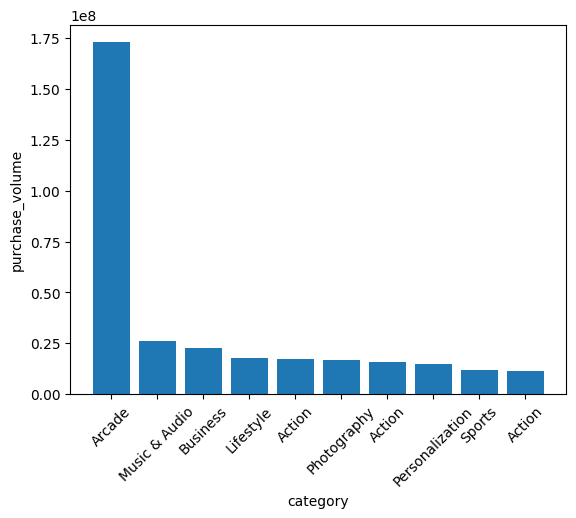

In [110]:
_.bar()

In [111]:
%%sql
SELECT
    a.appname,
    ROUND((CAST(p.averageinstalls AS NUMERIC) * CAST(p.price AS NUMERIC)), 2) AS purchase_volume
FROM
    playstore AS p
JOIN
    app AS a ON a.key = p.appkey
WHERE
    p.price > 0
GROUP BY
    a.appname,p.averageinstalls,p.price
ORDER BY
    purchase_volume DESC
LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


appname,purchase_volume
Minecraft,172956540.89
Poweramp Full Version Unlocker,26152021.14
OfficeSuite Pro + PDF,22624422.13
Sleep as Android Unlock 💤 Sleep cycle smart alarm,17931138.03
Hitman Sniper,17304652.53
LockMyPix Photo Vault PRO: Hide Photos and Videos,16663445.64
Grand Theft Auto: San Andreas,15900942.87
Nova Launcher Prime,14697625.84
True Skate,11980275.61
Stickman Legends-Shadow Fight Premium Offline Game,11515908.69


Select app name against calculated purchase volume for paid apps from the Google Play Store dataset. It groups the results appname, price,and average installs,orders them by purchase volume in descending order.
We select category to understand is purchased volume. Purchase volume is the average installs times price.We aare choosing round to rounding off to two deecimal digits.
The most purchased app is Minecraft and the second most purchased app is Poweramp Full Version .

<BarContainer object of 10 artists>

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


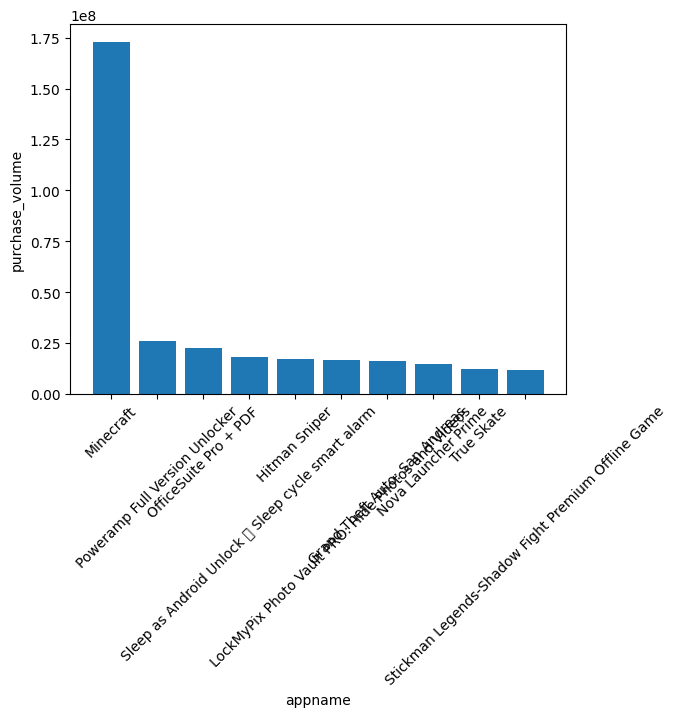

In [112]:
_.bar()

In [119]:
%%sql
SELECT
    a.appname,p.rating,
    ROUND((CAST(p.averageinstalls AS NUMERIC) * CAST(p.price AS NUMERIC)), 2) AS purchase_volume
FROM
    playstore AS p
JOIN
    app AS a ON a.key = p.appkey
WHERE
    p.price > 0

ORDER BY
    purchase_volume DESC
LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


appname,rating,purchase_volume
Minecraft,4.6,172956540.89
Poweramp Full Version Unlocker,4.2,26152021.14
OfficeSuite Pro + PDF,4.0,22624422.13
Sleep as Android Unlock 💤 Sleep cycle smart alarm,4.9,17931138.03
Hitman Sniper,4.4,17304652.53
LockMyPix Photo Vault PRO: Hide Photos and Videos,4.7,16663445.64
Grand Theft Auto: San Andreas,4.0,15900942.87
Nova Launcher Prime,4.7,14697625.84
True Skate,4.4,11980275.61
Stickman Legends-Shadow Fight Premium Offline Game,4.3,11515908.69


Select rating against calculated purchase volume for paid apps from the Google Play Store dataset.WE orders them by purchase volume in descending order.
We select category to understand is purchased volume. Purchase volume is the average installs times price.

Check whether people really like the top-selling app. thus incorporating the  rating of the top selling. app.The top rated app is Sleep as Android Unlock 💤 Sleep cycle smart alar

<BarContainer object of 10 artists>

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


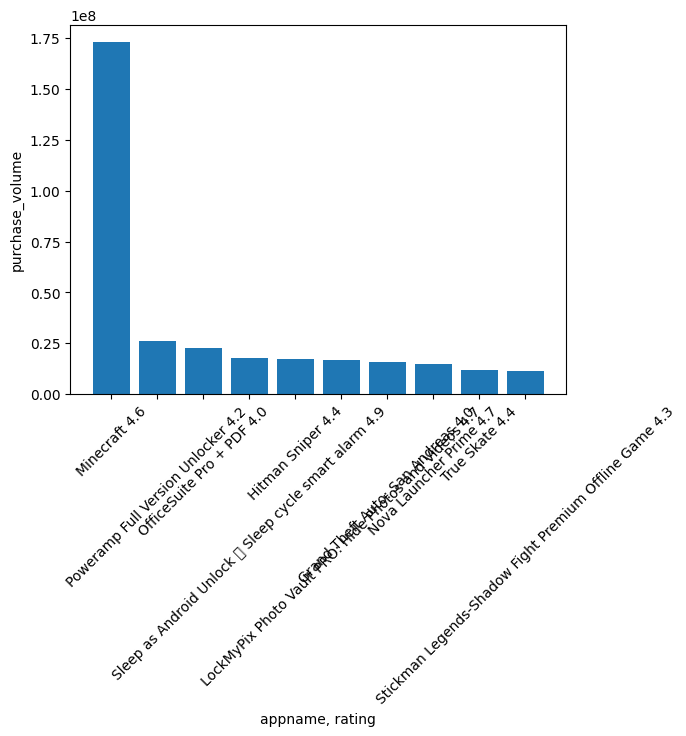

In [120]:
_.bar()

### Problem 2

### Identify the top categories of apps that have an average rating greater than 4.2. Compare the average ratings between paid and free apps within those top categories.

For the query below, I select category and average rating from app and playstore table; lnik and join app key from app and playstore; I set all the rating greater than 0 due to two reasons, first is that we set all null variable in rating column to value 0 and second is that by understanding this data column content there is no way to rate 0 star to an app because the minimum value is 1 star; group by the category; having average rating greater than 4.2 is my query requirments and want to find out the high quality app category; making the average rating in descending order; I want no more than 10 categories

In [87]:
%%sql 
SELECT 
    a.category, ROUND(AVG(p.rating),2) AS avg_rating
FROM 
    App as a
JOIN  
    playstore as p ON a.key = p.appkey
WHERE 
    p.rating > 0 
GROUP BY
    a.category
Having 
    ROUND(AVG(p.rating),2) >=4.20
ORDER BY 
    avg_rating DESC
LIMIT 10;

 * postgresql://student@/finalproject
9 rows affected.


category,avg_rating
Music & Audio,4.30
Books & Reference,4.29
Events,4.28
Arcade,4.26
Personalization,4.25
Puzzle,4.23
Word,4.22
Education,4.20
Shopping,4.20


In [78]:
%matplotlib inline

([<matplotlib.axis.YTick at 0x7fd69ceb5640>,
 [Text(0, 4.1, '4.10'),
  Text(0, 4.15, '4.15'),
  Text(0, 4.2, '4.20'),
  Text(0, 4.25, '4.25'),
  Text(0, 4.3, '4.30'),
  Text(0, 4.35, '4.35')])

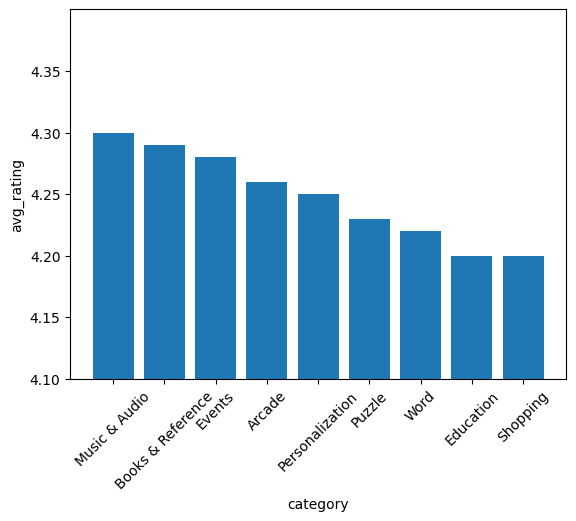

In [88]:
_.bar()
import matplotlib.pyplot as plt
plt.ylim(4.1, 4.4)  
plt.yticks([4.1, 4.15, 4.2, 4.25, 4.3, 4.35]) 

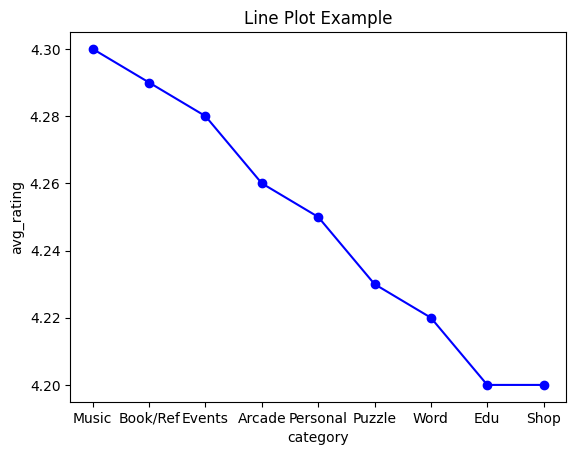

In [7]:
import matplotlib.pyplot as plt

x_values = ['Music', 'Book/Ref', 'Events', 'Arcade', 'Personal', 'Puzzle', 'Word', 'Edu', 'Shop']
y_values = [4.30,4.29,4.28,4.26,4.25,4.23,4.22,4.20,4.20]

plt.plot(x_values, y_values, color='blue', marker='o')  # 'o' for circle marker

plt.title('Line Plot Example')
plt.xlabel('category')
plt.ylabel('avg_rating')

plt.show()

For the query below, I select category and average rating from app and playstore table; lnik and join app key from app and playstore; I set all the rating greater than 0 due to two reasons, first is that we set all null variable in rating column to value 0 and second is that by understanding this data column content there is no way to rate 0 star to an app because the minimum value is 1 star; also, for this query, I want ot see how is free app average rating performed in order compare and contrast to the paid app; group by the category; having average rating greater than 4.2 is my query requirments and want to find out the high quality app category; making the average rating in descending order; I want no more than 10 categories

In [97]:
%%sql 
SELECT 
    a.category, ROUND(AVG(p.rating),2) AS avg_rating
FROM 
    App as a
JOIN  
    playstore as p ON a.key = p.appkey
WHERE 
    p.rating > 0 AND
    a.free = true
GROUP BY
    a.category
Having 
    ROUND(AVG(p.rating),2) >=4.20
ORDER BY 
    avg_rating DESC
LIMIT 10;

 * postgresql://student@/finalproject
9 rows affected.


category,avg_rating
Music & Audio,4.30
Events,4.29
Books & Reference,4.29
Arcade,4.26
Personalization,4.24
Puzzle,4.23
Word,4.22
Education,4.20
Shopping,4.20


In [98]:
%matplotlib inline

([<matplotlib.axis.YTick at 0x7fd69ce94be0>,
 [Text(0, 4.1, '4.10'),
  Text(0, 4.15, '4.15'),
  Text(0, 4.2, '4.20'),
  Text(0, 4.25, '4.25'),
  Text(0, 4.3, '4.30'),
  Text(0, 4.35, '4.35'),
  Text(0, 4.4, '4.40'),
  Text(0, 4.45, '4.45')])

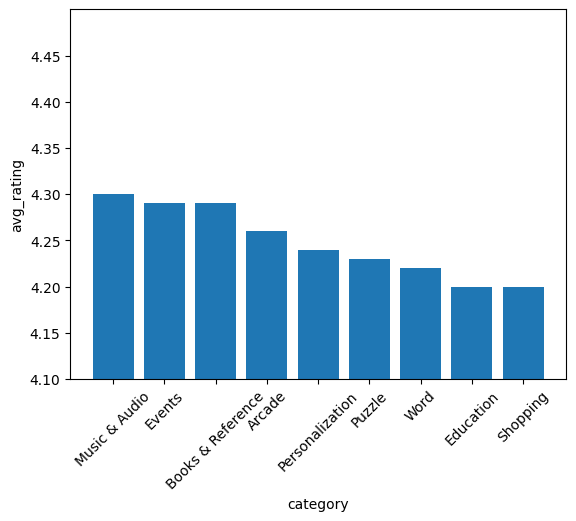

In [99]:
_.bar()
import matplotlib.pyplot as plt
plt.ylim(4.1, 4.5)  
plt.yticks([4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45]) 

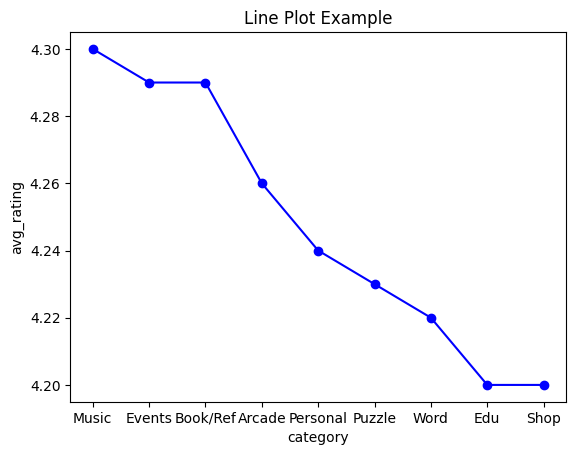

In [15]:
import matplotlib.pyplot as plt

x_values = ['Music', 'Events', 'Book/Ref', 'Arcade', 'Personal', 'Puzzle', 'Word', 'Edu', 'Shop']
y_values = [4.30,4.29,4.29,4.26,4.24,4.23,4.22,4.20,4.20]

plt.plot(x_values, y_values, color='blue', marker='o')  # 'o' for circle marker

plt.title('Line Plot Example')
plt.xlabel('category')
plt.ylabel('avg_rating')

plt.show()

For the query below, I select category and average rating from app and playstore table; lnik and join app key from app and playstore; I set all the rating greater than 0 due to two reasons, first is that we set all null variable in rating column to value 0 and second is that by understanding this data column content there is no way to rate 0 star to an app because the minimum value is 1 star; also, for this query, I want ot see how is paid app average rating performed in order compare and contrast to the free app; group by the category; having average rating greater than 4.2 is my query requirments and want to find out the high quality app category; making the average rating in descending order; I want no more than 10 categories

In [100]:
%%sql 
SELECT 
    a.category, ROUND(AVG(p.rating),2) AS avg_rating
FROM 
    App as a
JOIN  
    playstore as p ON a.key = p.appkey
WHERE 
    p.rating > 0 AND
    a.free = false
GROUP BY
    a.category
Having 
    ROUND(AVG(p.rating),2) >=4.20
ORDER BY 
    avg_rating DESC
LIMIT 10;

 * postgresql://student@/finalproject
10 rows affected.


category,avg_rating
Personalization,4.41
Comics,4.33
Puzzle,4.31
Music,4.29
Word,4.25
Books & Reference,4.24
Adventure,4.22
Education,4.20
Card,4.20
Role Playing,4.20


In [101]:
%matplotlib inline

([<matplotlib.axis.YTick at 0x7fd69c1a02e0>,
 [Text(0, 4.1, '4.10'),
  Text(0, 4.15, '4.15'),
  Text(0, 4.2, '4.20'),
  Text(0, 4.25, '4.25'),
  Text(0, 4.3, '4.30'),
  Text(0, 4.35, '4.35'),
  Text(0, 4.4, '4.40'),
  Text(0, 4.45, '4.45')])

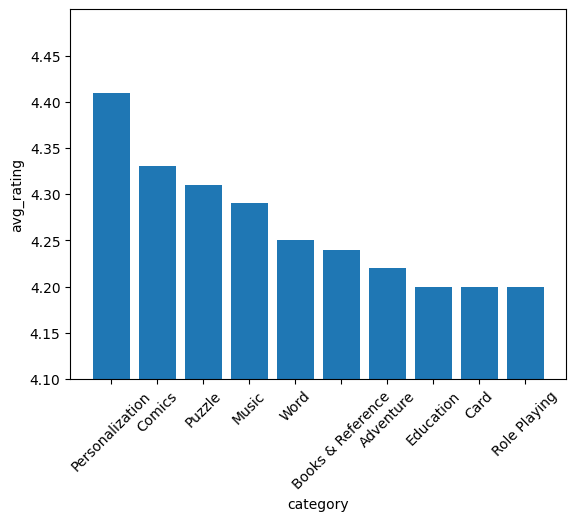

In [102]:
_.bar()
import matplotlib.pyplot as plt
plt.ylim(4.1, 4.5)  
plt.yticks([4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45]) 

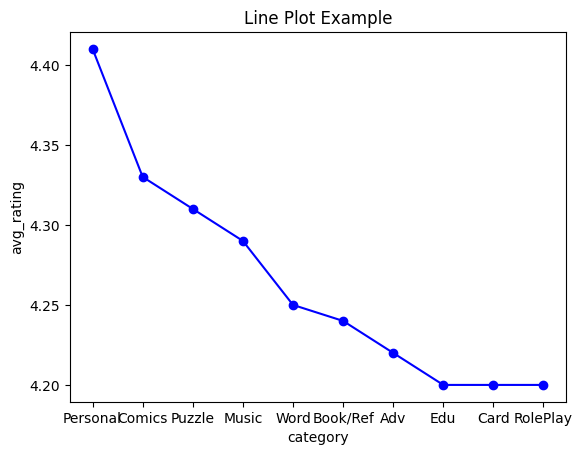

In [16]:
import matplotlib.pyplot as plt

x_values = ['Personal', 'Comics', 'Puzzle', 'Music', 'Word', 'Book/Ref', 'Adv', 'Edu', 'Card', 'RolePlay']
y_values = [4.41,4.33,4.31,4.29,4.25,4.24,4.22,4.20,4.20,4.20]

plt.plot(x_values, y_values, color='blue', marker='o')  # 'o' for circle marker

plt.title('Line Plot Example')
plt.xlabel('category')
plt.ylabel('avg_rating')

plt.show()

## Problem 3

### For those developers  who updated their apps in 3rd quarter of 2020 ,figure out which developer has the highest installs with rating

In [44]:
%%sql
SELECT DISTINCT
    d.Developerid,
    COUNT(*) OVER (PARTITION BY d.Developerid) AS NumberofApps,
    SUM(p.MaximumInstalls) OVER (PARTITION BY d.Developerid) AS HighestInstalls,
    ROUND(AVG(p.Rating) OVER (PARTITION BY d.Developerid), 2) AS AvgRating,
    MAX(p.RatingCount) OVER (PARTITION BY d.Developerid) AS TotalRatingCount
FROM
    playstore p
JOIN
    Developer d ON p.Developerkey = d.key
JOIN
    Date dt ON p.Released_key = dt.key
WHERE
    dt.quarter_of_year = 1
    AND dt.year = 2020
    AND p.Rating > 0
ORDER BY
    HighestInstalls DESC,
    AvgRating DESC
LIMIT 10;


 * postgresql://student@/finalproject
10 rows affected.


developerid,numberofapps,highestinstalls,avgrating,totalratingcount
Huawei Internet Services,3,803441420,3.93,70580
VOODOO,11,427914673,3.87,442785
Microsoft Corporation,3,376282975,4.03,342250
Playgendary Limited,3,280198062,4.37,617869
Zhigu Corporation Limited,1,250560189,4.60,272101
Lion Studios,9,199924268,3.98,781076
SayGames,8,180697678,4.23,281318
Good Job Games,3,150604035,4.13,148854
Hazel Mobile Games,1,130106307,4.00,252165
Popcore Games,6,104480001,3.63,215084


<BarContainer object of 10 artists>

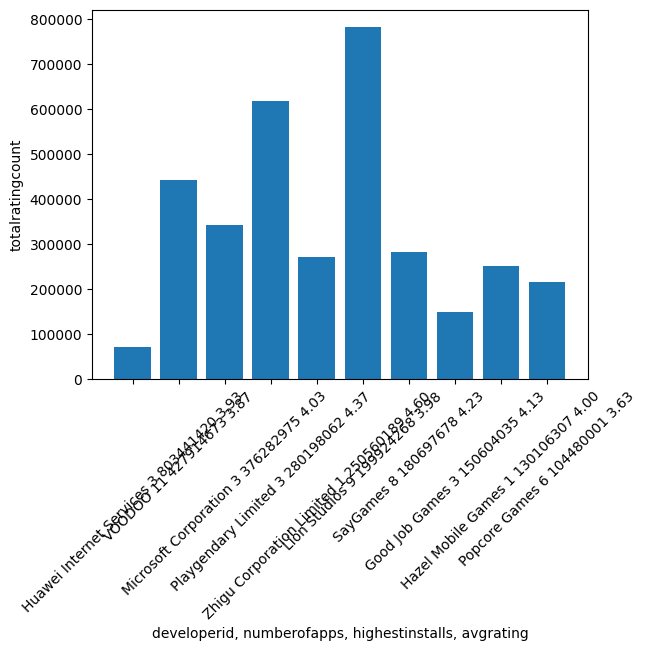

In [37]:
_.bar()

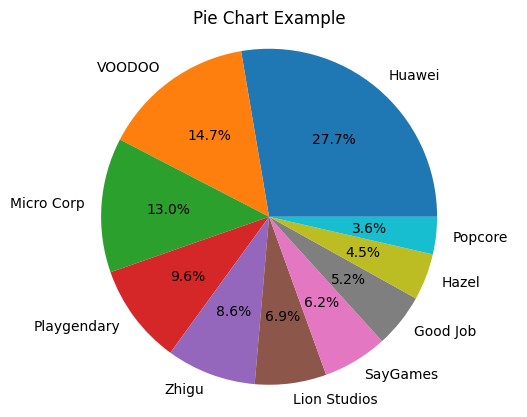

In [38]:
import matplotlib.pyplot as plt

sizes = [803441420, 427914673, 376282975, 280198062, 250560189, 199924268, 180697678, 150604035, 130106307, 104480001]
labels = ['Huawei', 'VOODOO', 'Micro Corp', 'Playgendary', 'Zhigu','Lion Studios','SayGames','Good Job','Hazel','Popcore']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

ax.axis('equal')

ax.set_title('Pie Chart Example')

plt.show()

In [45]:
%%sql
SELECT DISTINCT
    d.Developerid,
    COUNT(*) OVER (PARTITION BY d.Developerid) AS NumberofApps,
    SUM(p.MaximumInstalls) OVER (PARTITION BY d.Developerid) AS HighestInstalls,
    ROUND(AVG(p.Rating) OVER (PARTITION BY d.Developerid), 2) AS AvgRating,
    MAX(p.RatingCount) OVER (PARTITION BY d.Developerid) AS TotalRatingCount
FROM
    playstore p
JOIN
    Developer d ON p.Developerkey = d.key
JOIN
    Date dt ON p.Released_key = dt.key
WHERE
    dt.quarter_of_year = 2
    AND dt.year = 2020
    AND p.Rating > 0
ORDER BY
    HighestInstalls DESC,
    AvgRating DESC
LIMIT 10;


 * postgresql://student@/finalproject
10 rows affected.


developerid,numberofapps,highestinstalls,avgrating,totalratingcount
"Samsung Electronics Co., Ltd.",3,778618060,3.40,802834
Xiaomi Inc.,1,711617649,4.50,888372
VOODOO,10,368134041,3.83,341441
Outfit7 Limited,1,246877696,4.30,1928682
SayGames,7,194625690,4.30,271569
Zynga,8,173260120,3.76,322118
NIC eGov Mobile Apps,1,160870492,3.80,1576401
Lion Studios,10,156630831,3.63,292570
Bytedance Pte. Ltd.,1,152325724,4.40,1783290
Supersonic Studios LTD,5,127119411,4.00,285649


<BarContainer object of 10 artists>

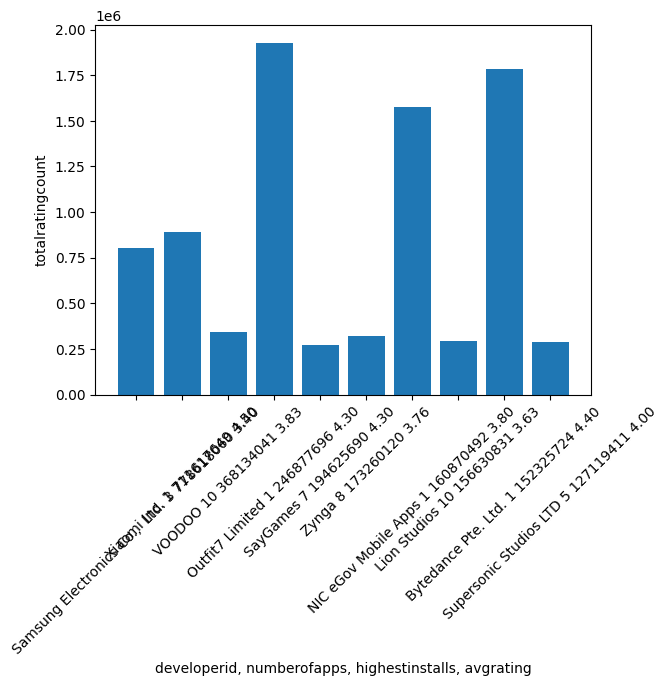

In [26]:
_.bar()

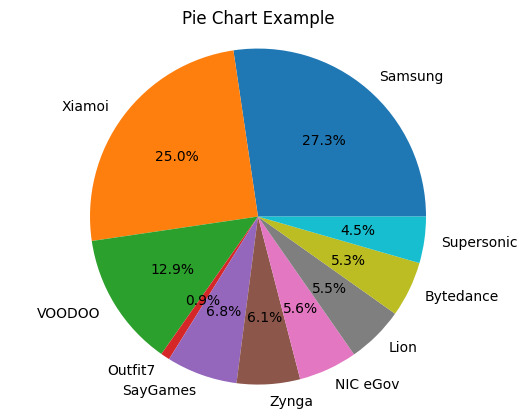

In [39]:
import matplotlib.pyplot as plt

sizes = [778618060, 711617649, 368134041, 24877696, 194625690, 173260120, 160870492, 156630831, 152325724, 127119411]
labels = ['Samsung', 'Xiamoi', 'VOODOO', 'Outfit7', 'SayGames','Zynga','NIC eGov','Lion','Bytedance','Supersonic']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

ax.axis('equal')

ax.set_title('Pie Chart Example')

plt.show()

In [46]:
%%sql
SELECT DISTINCT
    d.Developerid,
    COUNT(*) OVER (PARTITION BY d.Developerid) AS NumberofApps,
    SUM(p.MaximumInstalls) OVER (PARTITION BY d.Developerid) AS HighestInstalls,
    ROUND(AVG(p.Rating) OVER (PARTITION BY d.Developerid), 2) AS AvgRating,
    MAX(p.RatingCount) OVER (PARTITION BY d.Developerid) AS TotalRatingCount
FROM
    playstore p
JOIN
    Developer d ON p.Developerkey = d.key
JOIN
    Date dt ON p.Released_key = dt.key
WHERE
    dt.quarter_of_year = 3
    AND dt.year = 2020
    AND p.Rating > 0
ORDER BY
    HighestInstalls DESC,
    AvgRating DESC
LIMIT 10;


 * postgresql://student@/finalproject
10 rows affected.


developerid,numberofapps,highestinstalls,avgrating,totalratingcount
Lion Studios,24,359826775,3.94,280278
Motorola Mobility LLC.,7,264077130,4.09,17761
Crazy Labs by TabTale,6,208247663,3.83,320908
VOODOO,11,206336354,4.03,389294
CASUAL AZUR GAMES,25,145981432,4.06,109308
Supersonic Studios LTD,5,144400818,3.78,166704
Ver Se Innovation,1,126046716,4.00,1073
BabyBus,11,88658274,4.22,30306
SayGames,3,79503926,4.20,236064
Good Job Games,3,71631494,3.97,187379


<BarContainer object of 10 artists>

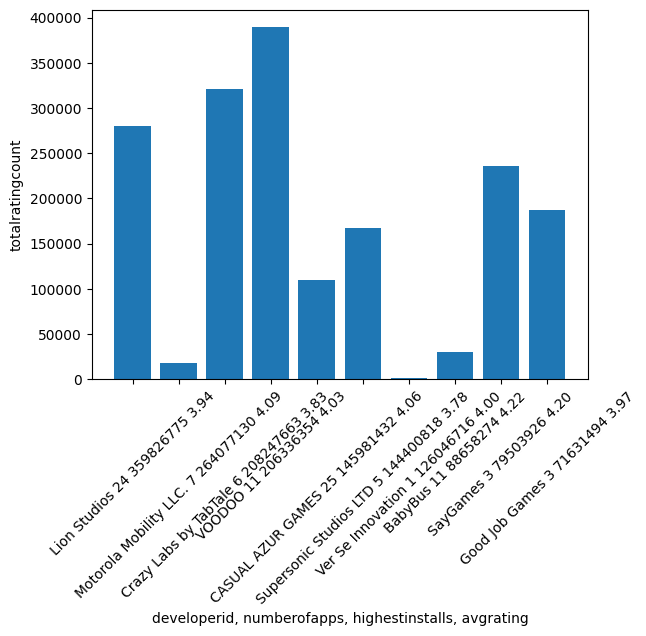

In [28]:
_.bar()

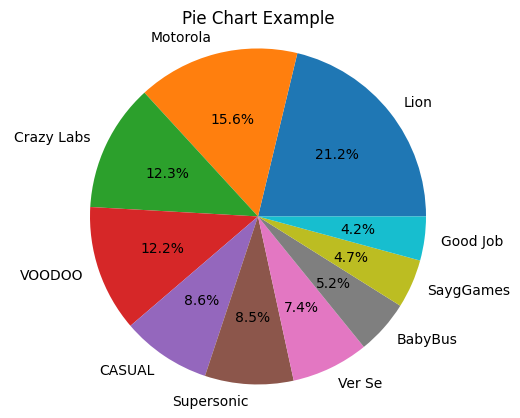

In [48]:
import matplotlib.pyplot as plt

sizes = [359826775, 264077130, 208247663, 206336354, 145981432, 144400818, 126046716, 88658274, 79503926, 71631494]
labels = ['Lion', 'Motorola', 'Crazy Labs', 'VOODOO', 'CASUAL', 'Supersonic','Ver Se','BabyBus','SaygGames','Good Job']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

ax.axis('equal')

ax.set_title('Pie Chart Example')
plt.show()

In [49]:
%%sql
SELECT DISTINCT
    d.Developerid,
    COUNT(*) OVER (PARTITION BY d.Developerid) AS NumberofApps,
    SUM(p.MaximumInstalls) OVER (PARTITION BY d.Developerid) AS HighestInstalls,
    ROUND(AVG(p.Rating) OVER (PARTITION BY d.Developerid), 2) AS AvgRating,
    MAX(p.RatingCount) OVER (PARTITION BY d.Developerid) AS TotalRatingCount
FROM
    playstore p
JOIN
    Developer d ON p.Developerkey = d.key
JOIN
    Date dt ON p.Released_key = dt.key
WHERE
    dt.quarter_of_year = 4
    AND dt.year = 2020
    AND p.Rating > 0
ORDER BY
    HighestInstalls DESC,
    AvgRating DESC
LIMIT 10;


 * postgresql://student@/finalproject
10 rows affected.


developerid,numberofapps,highestinstalls,avgrating,totalratingcount
VOODOO,10,239565372,3.79,146215
Xiaomi Inc.,2,231010187,4.50,30028
"Samsung Electronics Co., Ltd.",2,179774314,4.25,6023
ShareChat,1,167452482,4.10,770603
Lion Studios,18,161928133,3.82,160048
CASUAL AZUR GAMES,27,139914762,3.99,157449
SayGames,4,139136131,4.05,121193
Crazy Labs by TabTale,6,112309974,3.22,144840
Supersonic Studios LTD,3,102609243,4.00,204491
Kwalee Ltd,6,75599839,4.02,179264


<BarContainer object of 10 artists>

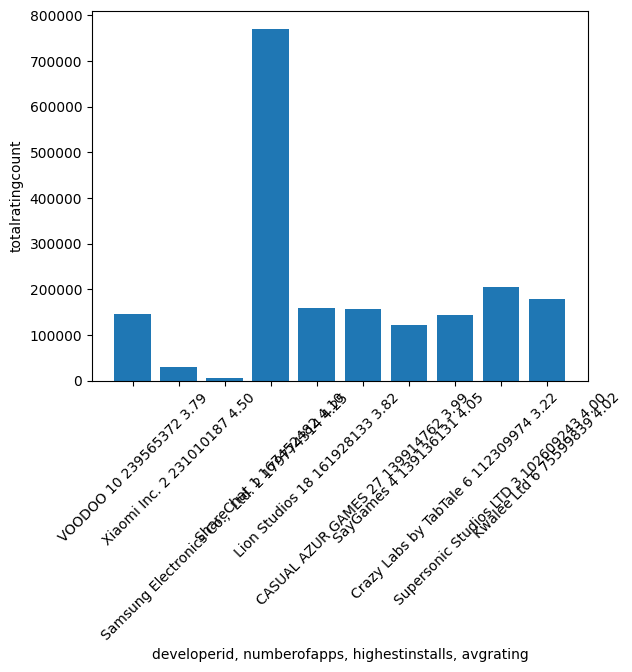

In [30]:
_.bar()

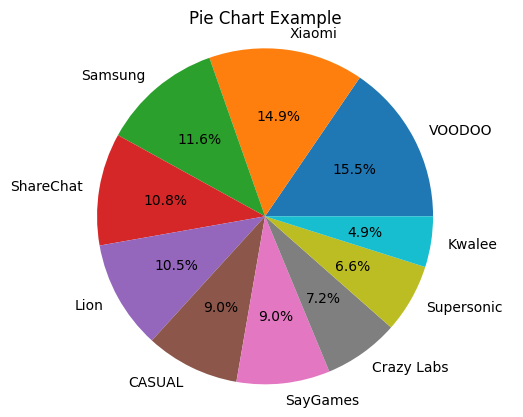

In [50]:
import matplotlib.pyplot as plt

sizes = [239565372, 231010187, 179774314, 167452482, 161928133, 139914762, 139136131, 112309974, 102609243, 75599839]
labels = ['VOODOO', 'Xiaomi', 'Samsung', 'ShareChat', 'Lion','CASUAL','SayGames','Crazy Labs','Supersonic','Kwalee']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

ax.axis('equal')

ax.set_title('Pie Chart Example')

plt.show()

Code explanation
SELECT DISTINCT "developerid": Retrieves distinct developer IDs from the playstore table.

The COUNT(*) OVER (PARTITION BY "developerid") Counts the number of apps for each developer using a window function (COUNT) partitioned by the developerid. This provides the total number of apps developed by each developer.

We use 'SUM("maximuminstalls") 
)' to calculate the total number of maximum installs across all apps for each developer using a window function (SUM). This represents the highest total installations for any app developed by each developer.
The PARTITION BY clause divides the result set into partitions to which the window function is applied independently. It acts similar to the GROUP BY clause but is specific to window functions.This clause allows to perform calculations on subsets of data based on specified criteria.

AVG("rating") OVER (PARTITION BY "developerid") Retrieves the average rating achieved by any app for each developer using a window function (AVG) rounding it to two decimal places..

MAX("ratingcount") OVER (PARTITION BY "developerid") AS "Total Rating Count": Retrieves the total count of ratings across all apps for each developer using a window function (MAX). This represents the highest total rating count received by any app developed by each developer.We take this because we need to know if the rating achieved is beacause of a few users or many users which affects the installations.

FROM Clause:

playstore p: Alias for the playstore table.
Developer d: Alias for the Developer table.
Date dt: Alias for the Date table.

JOIN Clauses:
We join the date and developer table with the playstore table to retrieve the columns needed as some columns were dropped previously.
JOIN Developer d ON p.Developerkey = d.key: Joining the playstore and Developer tables on the Developer key.
JOIN Date dt ON p.Released_key = dt.key: Joining the playstore and Date tables on the Released key.

WHERE dt.quarter_of_year = 1 AND dt.year = 2020 AND p.Rating > 0: Filtering the results to consider only data from the first quarter of 2020 where the app rating is greater than 0 to include only those records where the releasedkey is within all the quarters and in the year 2020-Q1,Q2,Q3,Q4 .This year and quarters are specifically taken because during Covid time ,many developers would have released their apps during the lockdown and since everything was digitalized at that time,there would have been many installations.Hence we chose this particular year and quarters of the year.

ORDER BY "Highest Installs" DESC, "Rating" DESC: This Orders the results in descending order based on the highest installs and rating. This helps in identifying the top developers based on these criteria.


We particularly find those developers who released their apps during 2020 and figure out which developer has the highest installs with rating and compare them in each quarter.

Business Significance:
This query provides insights into the performance of app developers during the four quarters of 2020.
It helps identify developers with the highest number of apps, highest total installs, and highest ratings, allowing stakeholders to recognize successful developers.
Businesses can use this information for partnership opportunities, marketing strategies, and decision-making regarding app development initiatives. Partnering with successful developers can enhance the visibility and reach of a business's products or services.

Insights into the highest-rated apps and total rating counts can help businesses understand what features or qualities contribute to user engagement and satisfaction. This knowledge can inform the development of new features or improvements to existing products.
Analyzing developer performance provides insights into the competitive landscape. Businesses can benchmark their own performance against top developers and identify areas for improvement or innovation.

Inference:
We can find that it's not just that the top Rated apps have the highest number of installations.Even the apps that have a less rating compared to other apps have a large nu,ber of instllations.